In [1]:
# =========================
# Instacart Customer Segmentation - EDA
# Notebook 01: Exploratory Data Analysis 
# =========================

from __future__ import annotations

import sys
from pathlib import Path
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
# Notebook setup
project_root = Path.cwd().resolve().parent
if (project_root / "src").exists():
    sys.path.insert(0, str(project_root))
else:
    # fallback: if cwd is already root, keep it
    project_root = Path.cwd().resolve()
    sys.path.insert(0, str(project_root))

# output folders
fig_dir = project_root / "artifacts" / "figures"
rep_dir = project_root / "artifacts" / "reports"
fig_dir.mkdir(parents=True, exist_ok=True)
rep_dir.mkdir(parents=True, exist_ok=True)

print("=" * 60)
print("INSTACART MARKET BASKET ANALYSIS - EDA")
print("=" * 60)
print(f"project_root: {project_root}")

# plotting defaults
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.grid"] = True
sns.set_context("notebook")

INSTACART MARKET BASKET ANALYSIS - EDA
project_root: /workspaces/instacart-customer-clustering


In [3]:
# -----------------------------------------------------------------------------
# 1) Load data via kagglehub (through src/)
# -----------------------------------------------------------------------------
print("\n[1] Loading datasets via kagglehub...")

from src.data.kaggle_download import download_instacart  # noqa: E402

data_dir = download_instacart()
data_dir = Path(data_dir)

print(f"data_dir: {data_dir}")

def read_csv(name: str, usecols: list[str] | None = None) -> pd.DataFrame:
    path = data_dir / name
    if not path.exists():
        raise FileNotFoundError(f"Missing file: {path}")
    return pd.read_csv(path, usecols=usecols)

orders = read_csv("orders.csv")
products = read_csv("products.csv")
aisles = read_csv("aisles.csv")
departments = read_csv("departments.csv")

# These two are big; load them after you confirm memory is ok
order_products_prior = read_csv("order_products__prior.csv")
order_products_train = read_csv("order_products__train.csv")

print(f"✓ Orders: {orders.shape}")
print(f"✓ Order Products (Prior): {order_products_prior.shape}")
print(f"✓ Order Products (Train): {order_products_train.shape}")
print(f"✓ Products: {products.shape}")
print(f"✓ Aisles: {aisles.shape}")
print(f"✓ Departments: {departments.shape}")


[1] Loading datasets via kagglehub...
data_dir: /home/codespace/.cache/kagglehub/datasets/psparks/instacart-market-basket-analysis/versions/1
✓ Orders: (3421083, 7)
✓ Order Products (Prior): (32434489, 4)
✓ Order Products (Train): (1384617, 4)
✓ Products: (49688, 4)
✓ Aisles: (134, 2)
✓ Departments: (21, 2)


In [4]:
# -----------------------------------------------------------------------------
# 2) Dataset overview
# -----------------------------------------------------------------------------
print("\n[2] Dataset Overview")
print("-" * 60)

print("\n📦 ORDERS TABLE (head):")
display(orders.head())
print(f"\nShape: {orders.shape}")
print(f"Columns: {list(orders.columns)}")
print(f"\nMissing values (orders):\n{orders.isnull().sum()}")
print(f"\nUnique users: {orders['user_id'].nunique():,}")
print(f"Total orders: {len(orders):,}")

print("\n📦 PRODUCTS TABLE (head):")
display(products.head())
print(f"\nShape: {products.shape}")
print(f"Unique products: {products['product_id'].nunique():,}")
print(f"Unique aisles: {products['aisle_id'].nunique()}")
print(f"Unique departments: {products['department_id'].nunique()}")

order_products = pd.concat([order_products_prior, order_products_train], ignore_index=True)
print(f"\n📦 COMBINED ORDER PRODUCTS:")
print(f"Total order-product pairs: {len(order_products):,}")



[2] Dataset Overview
------------------------------------------------------------

📦 ORDERS TABLE (head):


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0



Shape: (3421083, 7)
Columns: ['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']

Missing values (orders):
order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

Unique users: 206,209
Total orders: 3,421,083

📦 PRODUCTS TABLE (head):


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13



Shape: (49688, 4)
Unique products: 49,688
Unique aisles: 134
Unique departments: 21

📦 COMBINED ORDER PRODUCTS:
Total order-product pairs: 33,819,106



[3] User Behavior Analysis
------------------------------------------------------------

📊 Orders per User:
Mean: 16.59
Median: 10.00
Min: 4
Max: 100
Std: 16.65


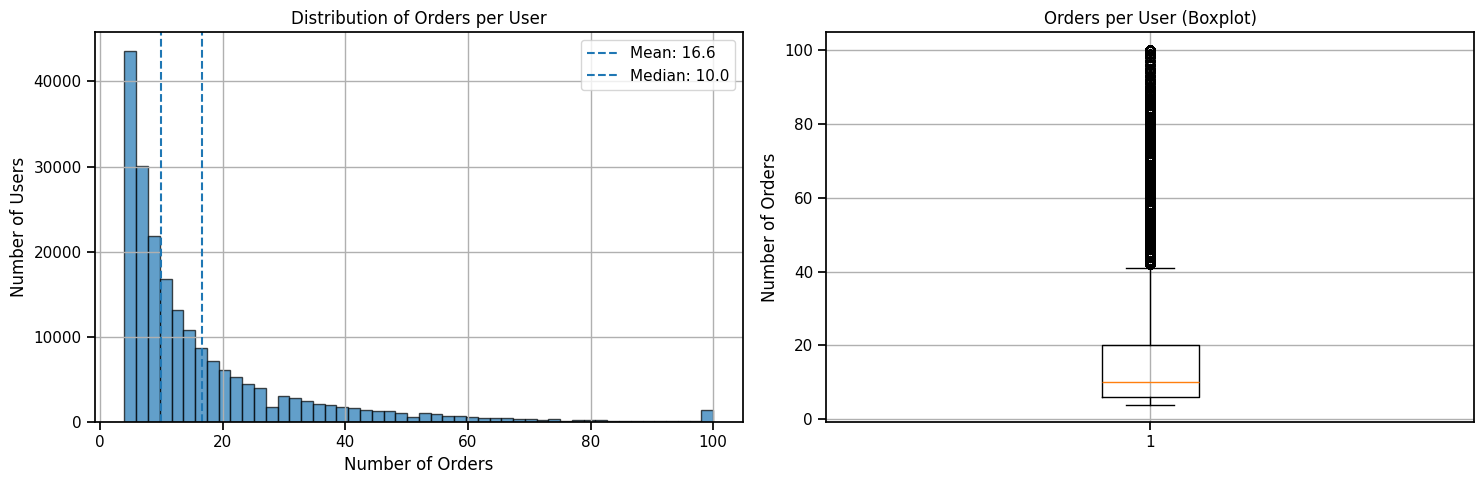

✓ Saved figure: /workspaces/instacart-customer-clustering/artifacts/figures/orders_per_user_distribution.png

✂️ Filtering users with at least 5 orders:
Users before: 206,209
Users after: 182,223
Retention: 88.4%


In [5]:
# -----------------------------------------------------------------------------
# 3) User behavior analysis
# -----------------------------------------------------------------------------
print("\n[3] User Behavior Analysis")
print("-" * 60)

orders_per_user = orders.groupby("user_id").size()

print("\n📊 Orders per User:")
print(f"Mean: {orders_per_user.mean():.2f}")
print(f"Median: {orders_per_user.median():.2f}")
print(f"Min: {orders_per_user.min()}")
print(f"Max: {orders_per_user.max()}")
print(f"Std: {orders_per_user.std():.2f}")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(orders_per_user, bins=50, edgecolor="black", alpha=0.7)
axes[0].set_xlabel("Number of Orders")
axes[0].set_ylabel("Number of Users")
axes[0].set_title("Distribution of Orders per User")
axes[0].axvline(orders_per_user.mean(), linestyle="--", label=f"Mean: {orders_per_user.mean():.1f}")
axes[0].axvline(orders_per_user.median(), linestyle="--", label=f"Median: {orders_per_user.median():.1f}")
axes[0].legend()

axes[1].boxplot(orders_per_user, vert=True)
axes[1].set_ylabel("Number of Orders")
axes[1].set_title("Orders per User (Boxplot)")

plt.tight_layout()
out_path = fig_dir / "orders_per_user_distribution.png"
plt.savefig(out_path, dpi=200, bbox_inches="tight")
plt.show()
print(f"✓ Saved figure: {out_path}")

MIN_ORDERS = 5
qualified_users = orders_per_user[orders_per_user >= MIN_ORDERS].index

print(f"\n✂️ Filtering users with at least {MIN_ORDERS} orders:")
print(f"Users before: {len(orders_per_user):,}")
print(f"Users after: {len(qualified_users):,}")
print(f"Retention: {len(qualified_users)/len(orders_per_user)*100:.1f}%")



[4] Temporal Patterns
------------------------------------------------------------

📅 Days Since Prior Order:
Mean: 11.11 days
Median: 7.00 days
Mode: 30 days


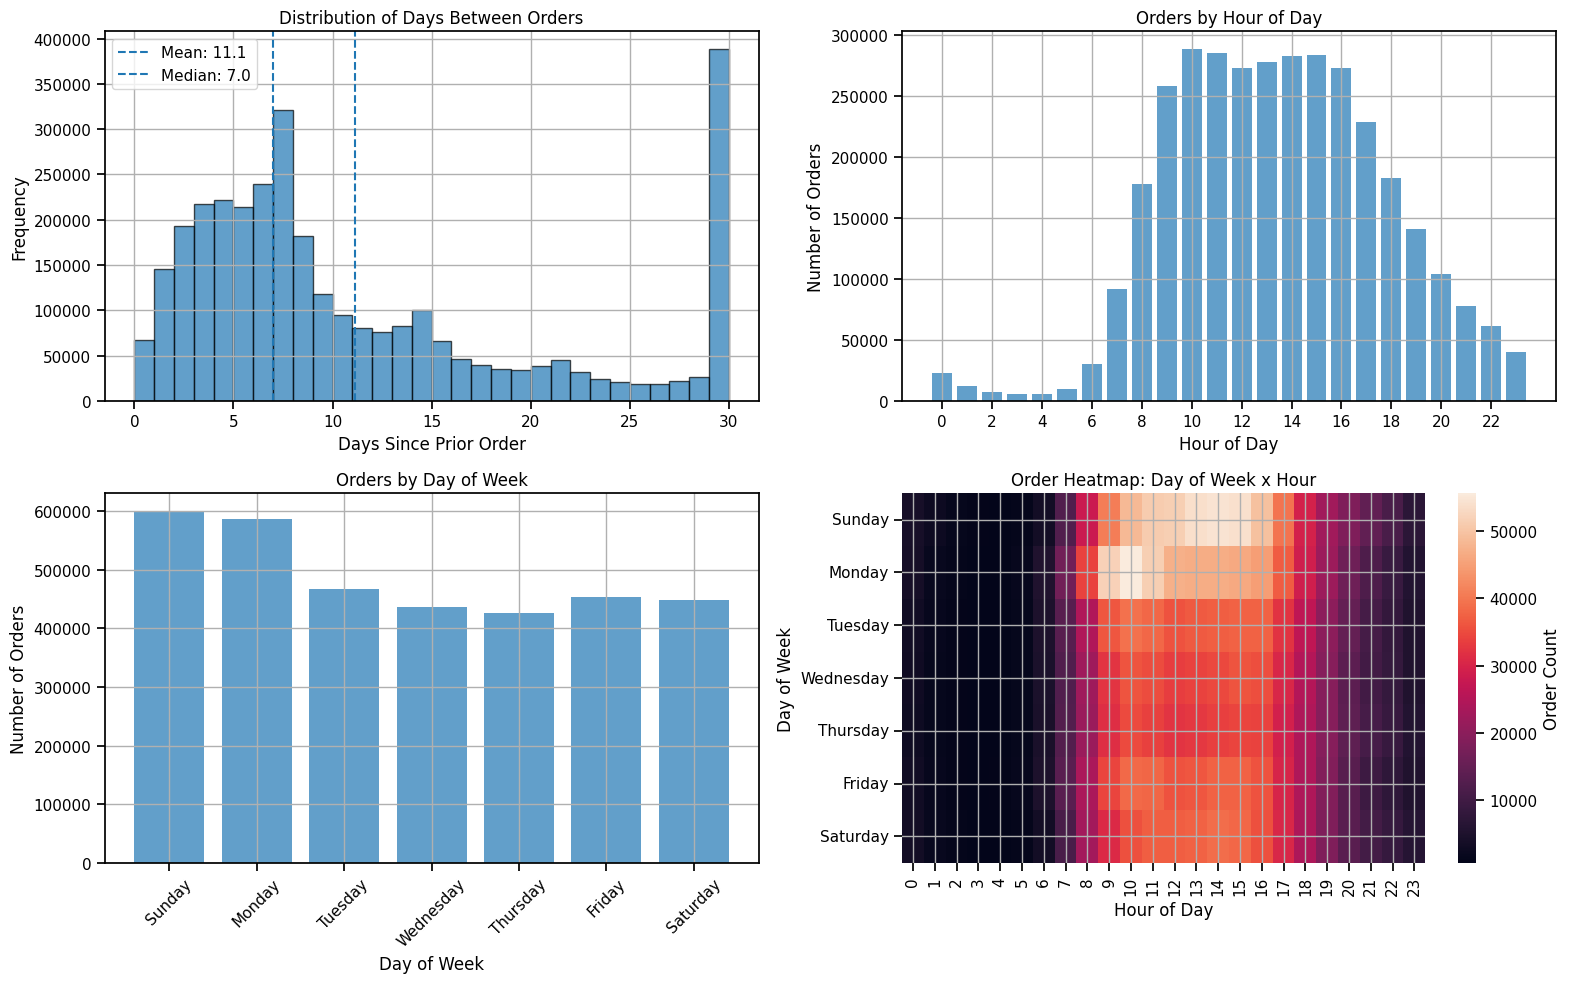

✓ Saved figure: /workspaces/instacart-customer-clustering/artifacts/figures/temporal_patterns.png


In [6]:
# -----------------------------------------------------------------------------
# 4) Temporal patterns
# -----------------------------------------------------------------------------
print("\n[4] Temporal Patterns")
print("-" * 60)

days_since = orders["days_since_prior_order"].dropna()
print("\n📅 Days Since Prior Order:")
print(f"Mean: {days_since.mean():.2f} days")
print(f"Median: {days_since.median():.2f} days")
if len(days_since.mode()) > 0:
    print(f"Mode: {days_since.mode().values[0]:.0f} days")

hour_counts = orders["order_hour_of_day"].value_counts().sort_index()
dow_counts = orders["order_dow"].value_counts().sort_index()
dow_map = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

axes[0, 0].hist(days_since, bins=30, edgecolor="black", alpha=0.7)
axes[0, 0].set_xlabel("Days Since Prior Order")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].set_title("Distribution of Days Between Orders")
axes[0, 0].axvline(days_since.mean(), linestyle="--", label=f"Mean: {days_since.mean():.1f}")
axes[0, 0].axvline(days_since.median(), linestyle="--", label=f"Median: {days_since.median():.1f}")
axes[0, 0].legend()

axes[0, 1].bar(hour_counts.index, hour_counts.values, alpha=0.7)
axes[0, 1].set_xlabel("Hour of Day")
axes[0, 1].set_ylabel("Number of Orders")
axes[0, 1].set_title("Orders by Hour of Day")
axes[0, 1].set_xticks(range(0, 24, 2))

dow_labels = [dow_map[i] for i in dow_counts.index]
axes[1, 0].bar(dow_labels, dow_counts.values, alpha=0.7)
axes[1, 0].set_xlabel("Day of Week")
axes[1, 0].set_ylabel("Number of Orders")
axes[1, 0].set_title("Orders by Day of Week")
axes[1, 0].tick_params(axis="x", rotation=45)

hour_dow_pivot = orders.groupby(["order_dow", "order_hour_of_day"]).size().unstack(fill_value=0)
sns.heatmap(hour_dow_pivot, ax=axes[1, 1], cbar_kws={"label": "Order Count"})
axes[1, 1].set_xlabel("Hour of Day")
axes[1, 1].set_ylabel("Day of Week")
axes[1, 1].set_title("Order Heatmap: Day of Week x Hour")
axes[1, 1].set_yticklabels([dow_map[i] for i in range(7)], rotation=0)

plt.tight_layout()
out_path = fig_dir / "temporal_patterns.png"
plt.savefig(out_path, dpi=200, bbox_inches="tight")
plt.show()
print(f"✓ Saved figure: {out_path}")



[5] Product Analysis
------------------------------------------------------------

🔥 Top 20 Products:


,product_name,aisle,department,order_count
24851,Banana,fresh fruits,produce,472565
13175,Bag of Organic Bananas,fresh fruits,produce,379450
21136,Organic Strawberries,fresh fruits,produce,264683
21902,Organic Baby Spinach,packaged vegetables fruits,produce,241921
47208,Organic Hass Avocado,fresh fruits,produce,213584
47765,Organic Avocado,fresh fruits,produce,176815
47625,Large Lemon,fresh fruits,produce,152657
16796,Strawberries,fresh fruits,produce,142951
26208,Limes,fresh fruits,produce,140627
27844,Organic Whole Milk,milk,dairy eggs,137905



🛒 Top 20 Aisles:


,aisle,order_count
0,fresh fruits,3642188
1,fresh vegetables,3418021
2,packaged vegetables fruits,1765313
3,yogurt,1452343
4,packaged cheese,979763
5,milk,891015
6,water seltzer sparkling water,841533
7,chips pretzels,722470
8,soy lactosefree,638253
9,bread,584834



🏬 Department Distribution:


,department,order_count
0,produce,9479291
1,dairy eggs,5414016
2,snacks,2887550
3,beverages,2690129
4,frozen,2236432
5,pantry,1875577
6,bakery,1176787
7,canned goods,1068058
8,deli,1051249
9,dry goods pasta,866627


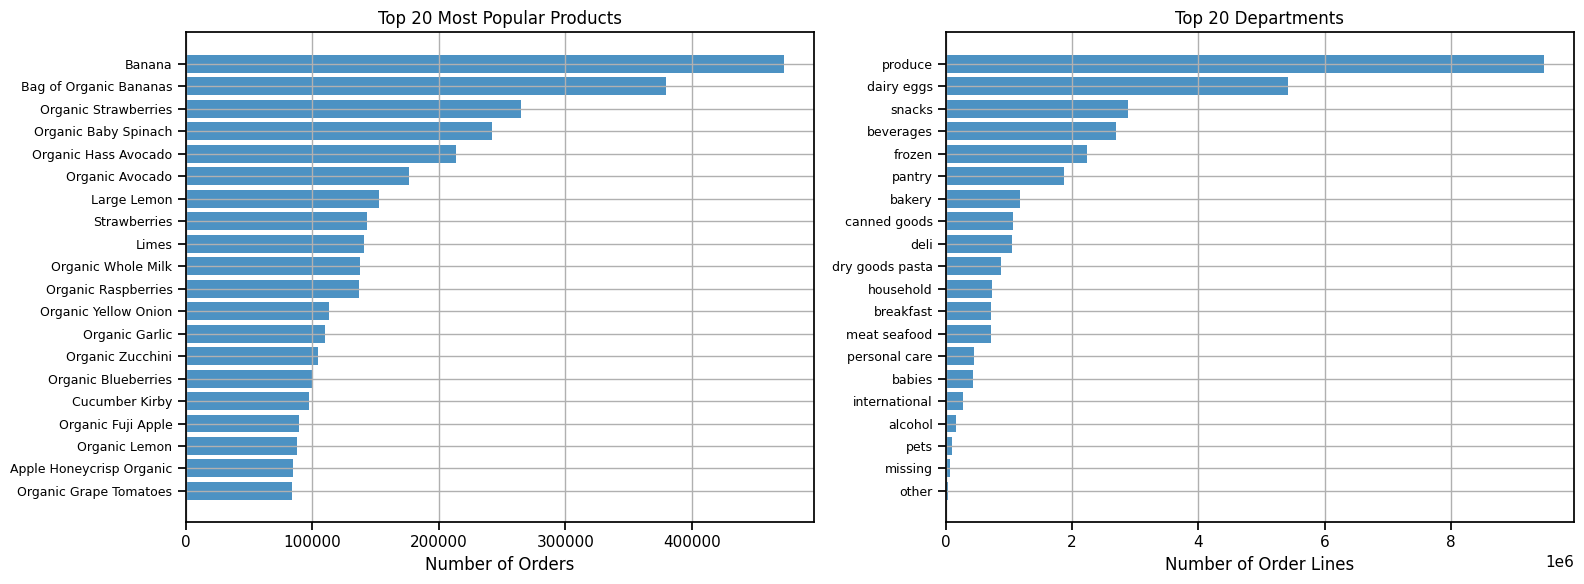

In [7]:
# ============================================================================
# 5. PRODUCT ANALYSIS
# ============================================================================
print("\n[5] Product Analysis")
print("-" * 60)

# Build product lookup table
products_full = (
    products.merge(aisles, on="aisle_id", how="left")
            .merge(departments, on="department_id", how="left")
)

# Use prior orders for product-level analysis
op = order_products_prior

# ----------------------------
# Top products
# ----------------------------
top_n = 20
top_product_ids = op["product_id"].value_counts().head(top_n)

top_products = (
    products_full.loc[
        products_full["product_id"].isin(top_product_ids.index),
        ["product_id", "product_name", "aisle", "department"]
    ]
    .merge(
        top_product_ids.rename("order_count"),
        left_on="product_id",
        right_index=True
    )
    .sort_values("order_count", ascending=False)
)

print("\n🔥 Top 20 Products:")
display(top_products[["product_name", "aisle", "department", "order_count"]])

# ----------------------------
# Aisle and department distribution
# ----------------------------
prod_to_aisle = products.set_index("product_id")["aisle_id"]
prod_to_dept = products.set_index("product_id")["department_id"]

aisle_counts = op["product_id"].map(prod_to_aisle).value_counts()
dept_counts = op["product_id"].map(prod_to_dept).value_counts()

aisle_names = aisles.set_index("aisle_id")["aisle"]
dept_names = departments.set_index("department_id")["department"]

aisle_counts_named = (
    aisle_counts.rename_axis("aisle_id")
    .reset_index(name="order_count")
    .assign(aisle=lambda df: df["aisle_id"].map(aisle_names))
)

dept_counts_named = (
    dept_counts.rename_axis("department_id")
    .reset_index(name="order_count")
    .assign(department=lambda df: df["department_id"].map(dept_names))
)

print("\n🛒 Top 20 Aisles:")
display(aisle_counts_named.head(20)[["aisle", "order_count"]])

print("\n🏬 Department Distribution:")
display(dept_counts_named[["department", "order_count"]])

# ----------------------------
# Visualizations
# ----------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top products
axes[0].barh(
    range(len(top_products)),
    top_products["order_count"].values,
    alpha=0.8
)
axes[0].set_yticks(range(len(top_products)))
axes[0].set_yticklabels(top_products["product_name"].values, fontsize=9)
axes[0].set_xlabel("Number of Orders")
axes[0].set_title("Top 20 Most Popular Products")
axes[0].invert_yaxis()

# Top departments (limit for readability)
top_depts = dept_counts_named.head(20)
axes[1].barh(
    range(len(top_depts)),
    top_depts["order_count"].values,
    alpha=0.8
)
axes[1].set_yticks(range(len(top_depts)))
axes[1].set_yticklabels(top_depts["department"].values, fontsize=9)
axes[1].set_xlabel("Number of Order Lines")
axes[1].set_title("Top 20 Departments")
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig(fig_dir / "product_popularity.png", dpi=300, bbox_inches="tight")
plt.show()



[6] Basket Analysis
------------------------------------------------------------

🛒 Items per Order:
Mean: 10.09
Median: 8.00
Min: 1
Max: 145
Std: 7.53

🔁 Overall Reorder Ratio: 58.97%


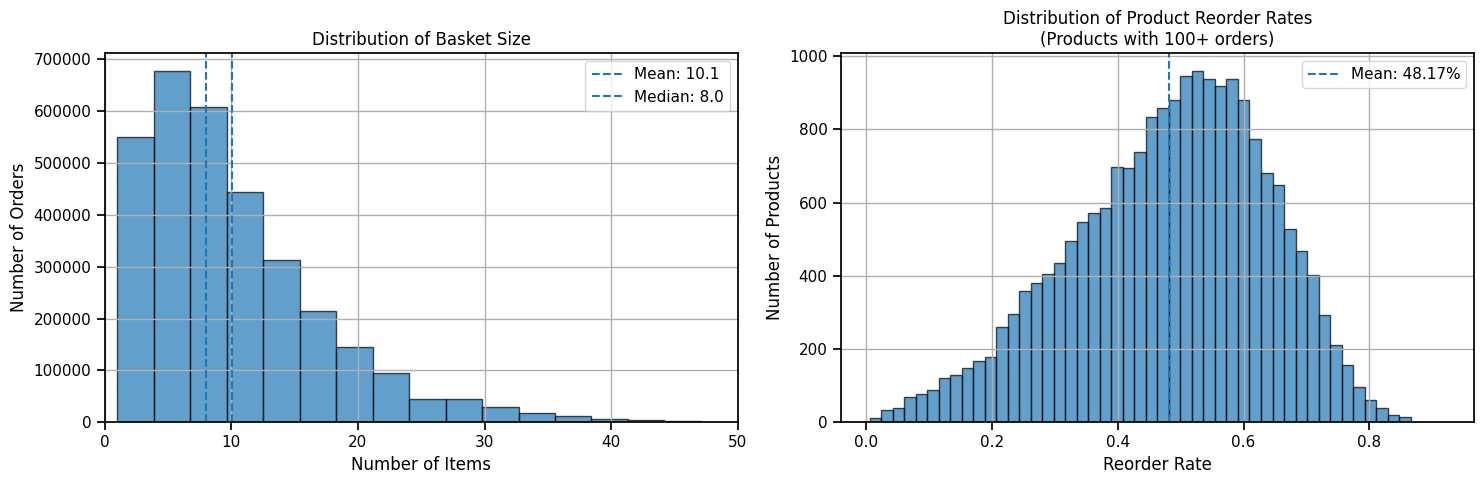

In [8]:
# ============================================================================
# 6. BASKET ANALYSIS
# ============================================================================
print("\n[6] Basket Analysis")
print("-" * 60)

op = order_products_prior

# Items per order
items_per_order = op.groupby("order_id").size()

print("\n🛒 Items per Order:")
print(f"Mean: {items_per_order.mean():.2f}")
print(f"Median: {items_per_order.median():.2f}")
print(f"Min: {items_per_order.min()}")
print(f"Max: {items_per_order.max()}")
print(f"Std: {items_per_order.std():.2f}")

# Overall reorder ratio
reorder_ratio = op["reordered"].mean()
print(f"\n🔁 Overall Reorder Ratio: {reorder_ratio:.2%}")

# Product reorder rate distribution (reliable products only)
product_reorder = op.groupby("product_id")["reordered"].agg(["mean", "count"])
product_reorder = product_reorder[product_reorder["count"] >= 100]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Basket size distribution
axes[0].hist(items_per_order, bins=50, edgecolor="black", alpha=0.7)
axes[0].set_xlabel("Number of Items")
axes[0].set_ylabel("Number of Orders")
axes[0].set_title("Distribution of Basket Size")
axes[0].axvline(items_per_order.mean(), linestyle="--", label=f"Mean: {items_per_order.mean():.1f}")
axes[0].axvline(items_per_order.median(), linestyle="--", label=f"Median: {items_per_order.median():.1f}")
axes[0].legend()
axes[0].set_xlim(0, 50)

# Reorder rate distribution
axes[1].hist(product_reorder["mean"], bins=50, edgecolor="black", alpha=0.7)
axes[1].set_xlabel("Reorder Rate")
axes[1].set_ylabel("Number of Products")
axes[1].set_title("Distribution of Product Reorder Rates\n(Products with 100+ orders)")
axes[1].axvline(product_reorder["mean"].mean(), linestyle="--",
                label=f"Mean: {product_reorder['mean'].mean():.2%}")
axes[1].legend()

plt.tight_layout()
plt.savefig(fig_dir / "basket_analysis.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:

# ============================================================================
# 7. DATA QUALITY CHECKS
# ============================================================================
print("\n[7] Data Quality Checks")
print("-" * 60)

print("\n🔍 Missing Values:")
print(f"Orders: {orders.isnull().sum().sum()} missing values")
print(f"Order Products (prior): {op.isnull().sum().sum()} missing values")
print(f"Products: {products.isnull().sum().sum()} missing values")


[7] Data Quality Checks
------------------------------------------------------------

🔍 Missing Values:
Orders: 206209 missing values
Order Products (prior): 0 missing values
Products: 0 missing values

🔍 Duplicates:


In [10]:
# ============================================================================
# 8. SUMMARY STATISTICS FOR CLUSTERING
# ============================================================================
print("\n[8] Summary Statistics for Clustering")
print("-" * 60)

# Save qualified users list for downstream feature engineering
qualified_users_df = pd.DataFrame({"user_id": qualified_users})

out_users = project_root / "artifacts" / "features" / "qualified_users.csv"
out_users.parent.mkdir(parents=True, exist_ok=True)
qualified_users_df.to_csv(out_users, index=False)

print(f"\n✓ Saved {len(qualified_users):,} qualified users to {out_users}")

summary_stats = {
    "Total Users": orders["user_id"].nunique(),
    "Qualified Users (5+ orders)": len(qualified_users),
    "Total Orders": len(orders),
    "Total Products": products["product_id"].nunique(),
    "Unique Aisles": products["aisle_id"].nunique(),
    "Unique Departments": products["department_id"].nunique(),
    "Avg Orders per User": float(orders_per_user.mean()),
    "Avg Items per Order": float(items_per_order.mean()),
    "Overall Reorder Rate": float(reorder_ratio),
    "Avg Days Between Orders": float(orders["days_since_prior_order"].dropna().mean()),
}

print("\n📊 Key Metrics Summary:")
for key, value in summary_stats.items():
    if isinstance(value, float):
        print(f"{key:.<35} {value:.4f}" if "Rate" in key else f"{key:.<35} {value:.2f}")
    else:
        print(f"{key:.<35} {value:,}")

summary_df = pd.DataFrame([summary_stats]).T
summary_df.columns = ["Value"]

out_summary = rep_dir / "eda_summary_stats.csv"
summary_df.to_csv(out_summary)

print(f"\n✓ Summary statistics saved to {out_summary}")

print("\n" + "=" * 60)
print("EDA COMPLETE!")
print("=" * 60)
print("\nNext Step: Run 02_feature_engineering.ipynb")


[8] Summary Statistics for Clustering
------------------------------------------------------------

✓ Saved 182,223 qualified users to /workspaces/instacart-customer-clustering/artifacts/features/qualified_users.csv

📊 Key Metrics Summary:
Total Users........................ 206,209
Qualified Users (5+ orders)........ 182,223
Total Orders....................... 3,421,083
Total Products..................... 49,688
Unique Aisles...................... 134
Unique Departments................. 21
Avg Orders per User................ 16.59
Avg Items per Order................ 10.09
Overall Reorder Rate............... 0.5897
Avg Days Between Orders............ 11.11

✓ Summary statistics saved to /workspaces/instacart-customer-clustering/artifacts/reports/eda_summary_stats.csv

EDA COMPLETE!

Next Step: Run 02_feature_engineering.ipynb
